Author: Sean Tulin
<br>
Date: Mar. 23, 2022
<br>
PHYS 2030 W22

# <font color=#46769B>Lesson 13: Discrete Fourier Transform</font>

## <font color=#46769B>Introduction</font>




## <font color=#46769B>Fourier series with complex exponentials</font>

### <font color=#46769B>Derivation</font>

Fourier series allows us to expand any (reasonable) periodic function (with period $T$) as a sum of sine and cosine functions

$$f(t) = a_0 + \sum_{k=1}^{\infty} \big( a_k \cos\left( 2\pi k t/T \right) + b_k \sin\left( 2\pi k t/T \right) \big) , \qquad (1)$$

where $k$ is a positive integer that labels the Fourier coefficients $a_k$ and $b_k$. A Fourier series can also be written in terms of complex exponential functions

$$f(t) = \sum_{k = -\infty}^{\infty} c_k  \, e^{2\pi i k t /T} \qquad (2)$$

where now the sum runs over *any* integer value of $k$. We can show that Eqs. (1) and (2) are equivalent. According to [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula), we have

$$e^{2\pi i k t /T} = \cos\left( 2\pi k t/T \right) + i \sin\left( 2\pi k t/T \right) \, .$$

Then Eq. (2) can be written as 

$$f(t) = \sum^{-1}_{k=-\infty} c_k \big( \cos\left( 2\pi k t/T \right) + i \sin\left( 2\pi k t/T \right) \big) + c_0 + \sum_{k=1}^{\infty} c_k  \big( \cos\left( 2\pi k t/T \right) + i \sin\left( 2\pi k t/T \right) \big) \, ,$$

where we have divided up the sum over $k$ into three terms: negative integers for $k$, $k=0$, and positive integers for $k$.
In the first term, we can relabel $k \to -k$ to write this as a sum over positive integers.

$$f(t) = \sum_{k=1}^{\infty} c_{-k} \big( \cos\left( -2\pi k t/T \right) + i \sin\left( -2\pi k t/T \right) \big) + c_0 + \sum_{k=1}^{\infty} c_k  \big( \cos\left( 2\pi k t/T \right) + i \sin\left( 2\pi k t/T \right) \big) \, .$$

Finally, we can combine the first and third terms together to get

$$f(t) = c_0 + \sum_{k=1}^{\infty} \big( (c_k + c_{-k}) \cos\left( 2\pi k t/T \right) + i(c_k - c_{-k}) \sin\left( 2\pi k t/T \right) \big) \, .$$

Comparing with Eq. (1), we have the correspondence

$$a_0 = c_0$$

$$\left. \begin{array}{c} a_k = (c_k + c_{-k}) \\ b_k = i(c_k - c_{-k}) \end{array} \right\} \; k > 0$$

$$\left. \begin{array}{c} c_k = \tfrac{1}{2} (a_k - i b_k) \\ c_{-k} = \tfrac{1}{2}  (a_k + i b_k) \end{array} \right\} \; k > 0$$

So, if you know if you know $a_k$ and $b_k$, you can convert to $c_k$ (and vice-versa).

If $f(t)$ is a *real* function, then all the Fourier coefficients $a_k$, $b_k$ must be real numbers. However, the Fourier coefficients $c_k$ need not be real, but they must satisfy

$$c_k = c_{-k}^*$$

where $^*$ denotes complex conjugation. That is,

$$c_{-k}^* = (a_k + i b_k)^* = a_k - i b_k = c_k \, .$$

As long as this is satisfied, our Fourier series for $f(t)$ will be *real* despite the fact that we are summing over *complex* exponentials.

### <font color=#46769B>Calculating Fourier coefficients</font>

In Lesson 12, we derived (in part) how to compute the Fourier coefficients $a_k$, $b_k$ for a given function $f(t)$. To compute our new Fourier coefficients $c_k$, you can simply follow the steps to compute $a_k$ and $b_k$, and then convert to $c_k$ following to formulas given above. However, it is much simpler just to compute $c_k$ directly according to the following formula

$$c_k = \frac{1}{T} \int_0^T dt \, f(t) \, e^{-2\pi i k t/T} \, . \qquad (3)$$

To prove Eq. (3), we plug our Fourier series in for $f(t)$ under the integral:

$$ \frac{1}{T} \int_0^T dt \, f(t) \, e^{-2\pi i k t/T} = 
\frac{1}{T} \int_0^T dt \, \left( \sum_{n=-\infty}^\infty c_n \, e^{2\pi i n t/T} \right)  e^{-2\pi i k t/T}
= \sum_{n=-\infty}^\infty c_n \, \frac{1}{T} \int_0^T dt \, e^{2\pi i (n-k) t/T} $$

where the $n$ labels the index being summed over so we don't get mixed up with the index $k$. In Lesson 12, we argued that

$$\frac{1}{T} \int_0^T dt \, e^{\pm 2\pi i (n-k) t/T} = \delta_{kn} = \left\{ \begin{array}{cc} 1 & k=n \\ 0 & k \ne n \end{array} \right.  .$$

This means that the term in the sum that contributes is where $k=n$, in which case the integral is 

$$\frac{1}{T} \int_0^T dt \, e^{\pm 2\pi i (n-k) t/T} = \frac{1}{T} \int_0^T dt = 1 \, .$$

So, we have

$$\frac{1}{T} \int_0^T dt \, f(t) \, e^{-2\pi i k t/T} = \sum_{n=-\infty}^\infty c_n \, \delta_{kn} = c_k$$

and this proves Eq. (3).

## <font color=#46769B>Complex numbers in Python</font>

It is helpful to know how we can handle complex numbers in Python. The syntax is, for example, 
```py
z1 = 12 + 6j
z2 = 3.4 - 12.2j
```
to write $z_1 = 12 + 6i$ and $z_2 = 3.4 - 12.2i$. That is, you attach a `j` to the end of an integer or float to make an imaginary number. Note that you *cannot* write `j` by itself to represent just the imaginary unit $i$. You have to write
```py
z3 = 1j
```
to write $z_3 = i$.




In [18]:
print('Imaginary unit is:', 1j)
print('Imaginary unit squared is', 1j**2, '\n')

print("Now print 'j' by itself:")
print(j)

Imaginary unit is: 1j
Imaginary unit squared is (-1+0j) 

Now print 'j' by itself:


NameError: name 'j' is not defined

Let's see what we can do with complex numbers. (Further reading can be found [here](https://realpython.com/python-complex-numbers/).)

First, here is some basic arthimetic with complex numbers.

In [38]:
z1 = 2 + 1j
z2 = 3.2 - 5.5j

print("Addition:", z1+z2)
print("Subtraction:", z1-z2)
print("Multiplication:", z1*z2)
print("Division:", z1*z2)

print("Real part:", z1.real)
print("Imaginary part:", z1.imag)

Addition: (5.2-4.5j)
Subtraction: (-1.2000000000000002+6.5j)
Multiplication: (11.9-7.8j)
Division: (11.9-7.8j)
Real part: 2.0
Imaginary part: 1.0


Next, we can also put complex numbers in `numpy.arrays`. As an example, consider Euler's formula

$$y(t) = e^{i t} = \cos(t) + i \sin(t) \, .$$

Let's plot the real and imaginary parts. We also plot the magnitude, which is just $|y(t)| = 1$.  We can also plot the phase or argument $\arg(y(t)) = t$. Because the phase only takes values from $-\pi$ to $\pi$, it appears to loop around from $\pi$ back to $-\pi$.

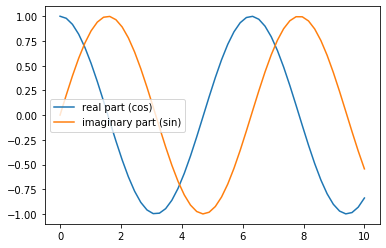

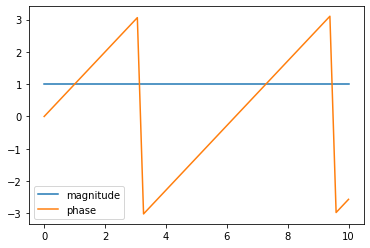

In [37]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,10)
y = np.exp(1j*t)

plt.plot(t,y.real,label='real part (cos)')
plt.plot(t,y.imag,label='imaginary part (sin)')
plt.legend()
plt.show()

plt.plot(t,np.abs(y),label='magnitude')
plt.plot(t,np.angle(y),label='phase')
plt.legend()
plt.show()

## <font color=#46769B>Discrete Fourier transform</font>

### <font color=#46769B>Derivation</font>

The starting point of the DFT is Eq. (3), the equation for computing complex exponential Fourier coefficients:

$$c_k = \frac{1}{T} \int_0^T dt \, f(t) \, e^{-2\pi i k t/T} \, .$$

If we know what $f(t)$ is *analytically*, we can calculate the Fourier coefficients $c_k$. But suppose we don't have complete knowledge of $f(t)$. Instead, we imagine that we are *measuring* $f(t)$ and that we do so at evenly-spaced intervals over one period $T$.
That is, imagine dividing one period, covering the range $t_0 \le t < t_0 + T$ into $N$ evenly-spaced steps of width $h=T/N$:

$$t_0, \, t_1, \, t_2 , \,  ... \, t_{N-1} \, ,$$

where $t_n = t_0 + nh$ for $n = 0, 1, ..., N-1$. Now, all the information about $f(t)$ is our measurements at these points

$$f_0 = f(t_0), \, f_1 = f(t_1) , \, f_2 = f(t_2) , \, ... \, , f_{N-1} = f(t_{N-1}) \, .$$  

We obviously don't have enough information to do an integral, but we can approximate the integral as a [sum over rectangles](https://en.wikipedia.org/wiki/Riemann_sum), illustrated in the following figure:

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/DFT_fig.PNG" width="400">
</div>

The height of each rectangle is set by $f_n$, and all have the same width $h$. The area under the curve is (approximately) the total area of all the rectangles. However, to approximate Eq. (3), we want to multiply the area of each rectangle by an additional phase factor $e^{-2\pi i k t_n/T}$, since that is the integral we want to do. In summary, Eq. (3) is approximated as

$$c_k = \frac{1}{T} \sum_{n=0}^{N-1} h \, f_n \, e^{-2\pi i k t_n/T} \, .$$

Now, let's use the fact that $h = T/N$ and $t_n = t_0 + nh$. If $t_0 = 0$, then we have

$$c_k = \frac{1}{N} \sum_{n=0}^{N-1} f_n \, e^{-2\pi i k n/N} \, . \qquad (4)$$

We have derived Eq. (4) as an *approximation* for calculating Fourier coefficients in the limit of incomplete knowledge of our function $f(t)$. We can also simply *define* Eq. (4) as its own separate concept: namely, Eq. (4) is the definition of the __Discrete Fourier Transform__. The measured values $f_n$ are called __samples__ and $N$ is the *number of samples*. 

Note that we can easily generalize to the case of $t_0 \ne 0$. After calculating the Fourier coefficients $c_k$ in Eq. (4), you simply multiply each coefficient by an extra phase factor of $e^{-2\pi i k t_0/T}$.

Further information on DFT can be found [here](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) or [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html). There are also several nice videos on YouTube: [video 1](https://www.youtube.com/watch?v=nl9TZanwbBk), [video 2](https://www.youtube.com/watch?v=mkGsMWi_j4Q).

### <font color=#46769B>Discussion</font>

How many Fourier coefficients can we compute? This is limited by the number of samples $N$. Namely, if we have $N$ samples, we can only compute $N$ coefficients, 

$$c_0, \, c_1, \, c_2 , \,  ... \, c_{N-1} \, .$$

If we try to calculate the next coefficient, $c_N$, we get

$$c_N = \frac{1}{N} \sum_{n=0}^{N-1} f_n \, e^{-2\pi i N n/N} = \frac{1}{N} \sum_{n=0}^{N-1} f_n  = c_0 \, ,$$

since $e^{-2\pi i n} = 1$. Similarly, we can show that $c_{N+1} = c_1$, $c_{N+2} = c_2$, etc. So, by periodicity of the phase factor, going beyond $N-1$, we just repeat coefficients that have already been calculated.

Furthermore, for real functions $f(t)$, there is an additional fact we can prove that

$$c_{N-k} = c_k^* \, , \qquad (5)$$

so, e.g., $c_{N-1} = c_1^*$, $c_{N-2} = c_2^*$, etc. Let's show this:

$$c_{N-k} = \frac{1}{N} \sum_{n=0}^{N-1} f_n \, e^{-2\pi i (N-k)n/N} = \frac{1}{N} \sum_{n=0}^{N-1} f_n \, e^{2\pi i k n/N} 
= \left( \frac{1}{N} \sum_{n=0}^{N-1} f_n \, e^{-2\pi i k n/N} \right)^* = c_k^*$$

provided our samples $f_n$ are real numbers, which they must be if $f(t)$ is a real function.



## <font color=#46769B>Example: cosine</font>

Let's illustrate an example for how DFT works with the simplest example, a cosine function

$$f(t) = \cos(2\pi t) $$

which has period $T=1$. It is straightforward to read off the Fourier coefficient, $a_1 = 1$, and all other Fourier coefficients are zero. Therefore we have

$$c_1 = c_{-1} = \tfrac{1}{2} \, .$$

Now, let's go through the steps for computing the DFT:
1. Generate some samples $f_n$. I will generate these from $f(t)$. So I need to decide on $N$, calculate the steps $t_n$, and then calculate $f_n = f(t_n)$. A useful function for computing $t_n$ is `numpy.arange(0,T,h)`, documented [here](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), which will generate steps
$$t_0, \, t_1, \, t_2 , \,  ... \, t_{N-1}$$
*without* including the final step in the interval like `numpy.linspace()` does.
2. Calculate the Fourier coefficients $c_k$ as a function of integer $k$, in the range from $0$ to $N-1$. Here we plug in to Eq. (4).

Finally, I will visualize the results using `matplotlib.pyplot.stem()` to make a "stem" plot. I show the real and imaginary parts of $c_k$ separately (the latter are zero, within numerical precision).

You will note below that 

$$c_1 = \tfrac{1}{2} , \quad c_9 = \tfrac{1}{2} \, .$$

This is exactly as we expected since recall $c_9 = c_{-1} = c_1^*$.



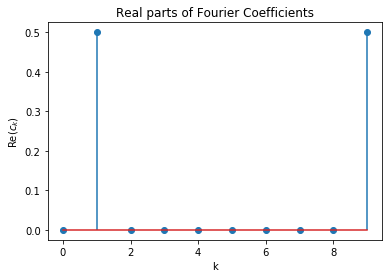

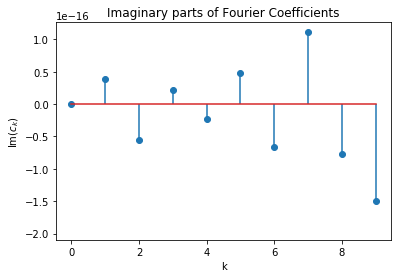

In [216]:
# Generate samples (I pick N=10)
N = 10
T = 1
h = T/N

tn = np.arange(0,T,h)
fn = np.cos(2*np.pi*tn)

# Take DFT and calculate Fourier coefficients for integers k
# Note want c_k to be complex in general and we need to tell numpy this explicitly up front
ck = np.zeros(N,dtype = 'complex')

for k in range(N):
    
    # Define values of n = [0,1,2,...,N-1]
    n = np.array(range(N))
    
    # Note fn and n are numpy arrays, so we are calculating 
    # all N terms at once and then summing over them
    ck[k] = 1/N * np.sum( fn * np.exp(-2j*np.pi*k*n/N) ) 

plt.stem(ck.real,use_line_collection=True)
plt.xlabel('k')
plt.ylabel(r'Re($c_k$)')
plt.title('Real parts of Fourier Coefficients')
plt.show()

plt.stem(ck.imag,use_line_collection=True)
plt.xlabel('k')
plt.ylabel(r'Im($c_k$)')
plt.title('Imaginary parts of Fourier Coefficients')
plt.show()



It might seem weird that $c_9$, which is the coefficient of $e^{18\pi i t/T}$, should be present, even though we argued that it was mathematically equivalent to $c_1$, the coefficient of $e^{2\pi i t/T}$. Don't these two function oscillate much differently? This is the key difference between taking the Fourier series of a *continuous function* $f(t)$ vs taking the DFT for our discrete samples $f_n$.

Let's plot the two functions as continuous functions (just the real parts). Obviously, they are very different! 

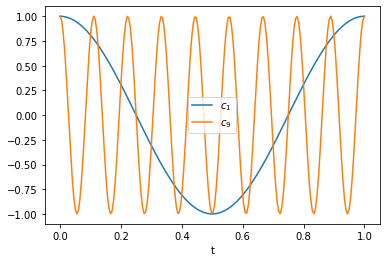

In [209]:
t = np.linspace(0,T,num=200)

plt.plot(t,np.cos(2*np.pi*t/T),label=r'$c_1$')
plt.plot(t,np.cos(18*np.pi*t/T),label=r'$c_9$')

plt.legend()
plt.xlabel('t')
plt.show()

Now let's plot the two functions *only at the sampling times* $t_n$. (We'll keep the original plot, but make the lines fainter.) You can see that *at the sampling times* both functions are exactly the same! DFT cannot distinguish between $k=1$ and $k=N-1 = 9$.

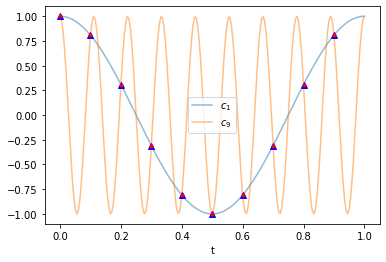

In [215]:
t = np.linspace(0,T,num=200)

plt.plot(t,np.cos(2*np.pi*t/T),label=r'$c_1$',alpha=0.5)
plt.plot(t,np.cos(18*np.pi*t/T),label=r'$c_9$',alpha=0.5)

tn = np.arange(0,T,h)
plt.plot(tn,np.cos(2*np.pi*tn/T),'b^')
plt.plot(tn,np.cos(18*np.pi*tn/T),'r.')

plt.legend()
plt.xlabel('t')
plt.show()